In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import japanize_matplotlib

In [4]:
# 賃料が高いマンションを省いたほうが良いという考えがあります。

In [5]:
# 母数が少ないサンプルを弾いたほうが良いという考えがあります。

In [6]:
# 使用するデータ
suumo = pd.read_csv('./data/csv/SuumoTokyoShaped20221026.csv')
print(suumo.shape)
print(suumo.columns)
suumo

(156943, 35)
Index(['カテゴリ', '建物名', '経度', '緯度', '都道府県', '市区町村', '市区町村以下', '皇居からの距離', '経度(区)',
       '緯度(区)', '路線', '駅', '経度(駅)', '緯度(駅)', '最寄駅からの距離', '歩', 'バス', '車', '築年数',
       '地上', '地下', '階数', '階', '賃料', '管理費', '敷金', '礼金', '間取り', '部屋数', '間取り_S',
       '間取り_L', '間取り_D', '間取り_K', '専有面積', 'url'],
      dtype='object')


,カテゴリ,建物名,経度,緯度,都道府県,市区町村,市区町村以下,皇居からの距離,経度(区),緯度(区),...,敷金,礼金,間取り,部屋数,間取り_S,間取り_L,間取り_D,間取り_K,専有面積,url
0,賃貸アパート,プチ・ボヌール,139.726883,35.554230,東京都,大田区,南蒲田３,14616.934378,139.716293,35.561337,...,14.8,14.8,42DK,42,0,0,1,1,48.87,https://suumo.jp/chintai/jnc_000046696863/?bc=...
1,賃貸一戸建て,荒川戸建,139.783234,35.737568,東京都,荒川区,荒川２,6553.671842,139.783615,35.735130,...,39.0,19.5,3SLDK,3,1,1,1,1,97.95,https://suumo.jp/chintai/jnc_000076009318/?bc=...
2,賃貸一戸建て,荒川戸建,139.783234,35.737568,東京都,荒川区,荒川２,6553.671842,139.783615,35.735130,...,39.0,19.5,3SLDK,3,1,1,1,1,97.95,https://suumo.jp/chintai/jnc_000076047600/?bc=...
3,賃貸マンション,ティモーネ上野の森ノース,139.780899,35.726601,東京都,荒川区,東日暮里４,5359.153627,139.783615,35.735130,...,15.2,15.2,2LDK,2,0,1,1,1,52.04,https://suumo.jp/chintai/jnc_000077318759/?bc=...
4,賃貸アパート,東京メトロ日比谷線 三ノ輪駅 3階建 築13年,139.795654,35.733616,東京都,荒川区,南千住５,6711.303856,139.783615,35.735130,...,11.3,11.3,1LDK,1,0,1,1,1,43.81,https://suumo.jp/chintai/jnc_000077330023/?bc=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156938,賃貸マンション,メゾンスギモト,139.892426,35.720993,東京都,江戸川区,東小岩１,13177.918724,139.867920,35.706589,...,8.5,8.5,2DK,2,0,0,1,1,40.00,https://suumo.jp/chintai/jnc_000069889741/?bc=...
156939,賃貸マンション,大場ビル,139.880020,35.700130,東京都,江戸川区,西一之江２,11532.265910,139.867920,35.706589,...,0.0,0.0,2LDK,2,0,1,1,1,47.25,https://suumo.jp/chintai/jnc_000019146531/?bc=...
156940,賃貸一戸建て,中澤貸家,139.902374,35.685436,東京都,江戸川区,江戸川２,13409.267611,139.867920,35.706589,...,16.8,0.0,3K,3,0,0,0,1,52.87,https://suumo.jp/chintai/jnc_000070035188/?bc=...
156941,賃貸マンション,東京メトロ副都心線 雑司が谷駅 7階建 築37年,139.716156,35.715145,東京都,豊島区,高田１,4903.290166,139.717392,35.725555,...,9.2,9.2,1DK,1,0,0,1,1,26.04,https://suumo.jp/chintai/jnc_000074167859/?bc=...


In [ ]:
# 変数全部
feature_name = [
    'カテゴリ',
    '建物名',  # いらない
    '経度',  # いる？
    '緯度',  # いる？
    '都道府県',  # いらない
    '市区町村',
    '市区町村以下',  # いらない
    '皇居からの距離',
    '経度(区)',  # いらない
    '緯度(区)',  # いらない
    '路線',
    '駅',
    '経度(駅)',  # いらない
    '緯度(駅)',  # いらない
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '賃料',
    '管理費',  # いる？
    '敷金',  # いる？
    '礼金',  # いる？
    '間取り',
    '部屋数', 
    '間取り_S', 
    '間取り_L', 
    '間取り_D', 
    '間取り_K',
    '専有面積',
    'url',  # いらない
]

In [ ]:
# 変数（絶対使わないであろう変数を削除）
feature_name = [
    'カテゴリ',
    '経度',  # いる？
    '緯度',  # いる？
    '市区町村',
    '皇居からの距離',
    '路線',
    '駅',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '賃料',
    '管理費',  # いる？
    '敷金',  # いる？
    '礼金',  # いる？
    '間取り',
    '部屋数', 
    '間取り_S', 
    '間取り_L', 
    '間取り_D', 
    '間取り_K',
    '専有面積',
]

In [ ]:
# 変数（だいたい使うであろう皆さん）
feature_name = [
    'カテゴリ',
    '市区町村',
    '皇居からの距離',
    '路線',
    '駅',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '賃料',
    '間取り',
    '部屋数', 
    '間取り_S', 
    '間取り_L', 
    '間取り_D', 
    '間取り_K',
    '専有面積',
]

# 線形回帰

分かりやすい奴から  
    量的変数→標準化  
    カテゴリ→OneHot（一つ削る）

### 量→標準化　質→OneHotで全部ぶち込む
結論：賃料高すぎ物件についていけない

In [329]:
# 準備フェイズ

from sklearn.linear_model import LinearRegression

suumo_LR = copy.copy(suumo.sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [179]:
# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category],axis=1)

# Xとyを定義
X = suumo_LR
y = suumo[target_feature]

# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

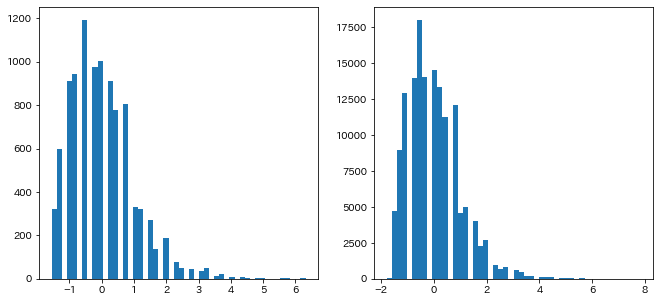

In [181]:
# きれいに分かれているかチェックシステム

i = 1

fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(X_train.iloc[:,i],bins=50)
ax2.hist(X_test.iloc[:,i],bins=50)
plt.show()

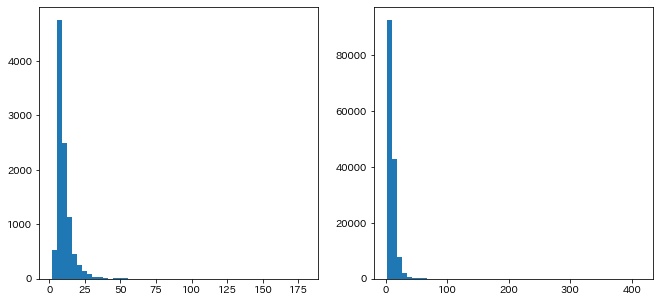

In [182]:
# きれいに分かれているかチェックシステム
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(y_train,bins=50)
ax2.hist(y_test,bins=50)
plt.show()

In [124]:
# 全部はさすがにゴミ
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8239383649385932
-3.340859242282493e+17


In [125]:
# 全部はさすがにゴミ
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

8.985640071028975
2.2758213074125844e+19


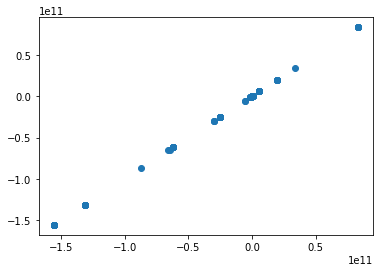

In [126]:
# 全部はさすがにゴミ
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

In [151]:
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
coef.iloc[50:100]

,feature,coef
50,路線_新交通ゆりかもめ,-7.698956e-01
51,路線_日暮里・舎人ライナー,-1.427158e+00
52,路線_東京メトロ丸ノ内線,-9.673767e-01
53,路線_東京メトロ副都心線,-2.072296e+00
54,路線_東京メトロ千代田線,-4.332886e-01
55,路線_東京メトロ半蔵門線,-2.991943e-01
56,路線_東京メトロ南北線,-2.333775e-01
57,路線_東京メトロ日比谷線,4.349670e-01
58,路線_東京メトロ有楽町線,-2.345604e+00
59,路線_東京メトロ東西線,-8.375549e-02


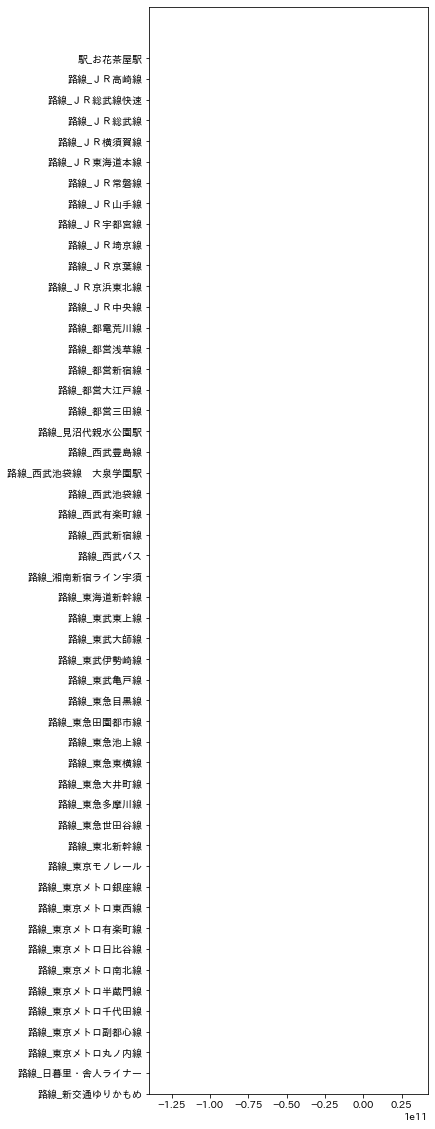

In [150]:
plt.figure(figsize=(5,20))
plt.bar(coef.loc[50:100,'coef'],coef.loc[50:100,'feature'])
plt.show()

### 量→標準化　質→使わない
結論：賃料高すぎ物件についていけない

In [330]:
# カテゴリなしならどうなる？

# Xとyを定義
X = suumo_LR[quantity_features]
y = suumo[target_feature]

# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

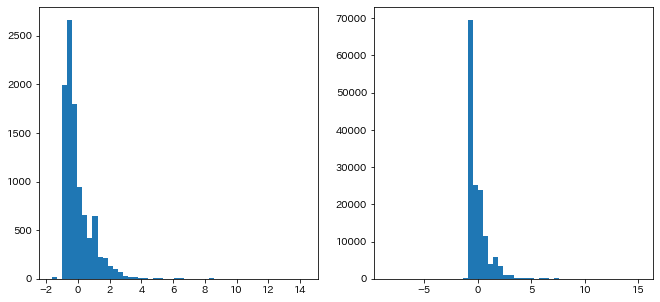

In [210]:
# きれいに分かれているかチェックシステム

i = 9

fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(X_train.iloc[:,i],bins=50)
ax2.hist(X_test.iloc[:,i],bins=50)
plt.show()

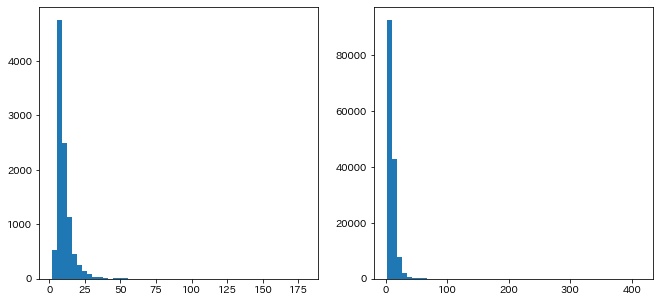

In [211]:
# きれいに分かれているかチェックシステム
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(y_train,bins=50)
ax2.hist(y_test,bins=50)
plt.show()

In [212]:
# いやわからん
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.0006612776962799938
-0.0005934969701191228


In [213]:
# いやわからん
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

51.00315048494956
68.16126736627463


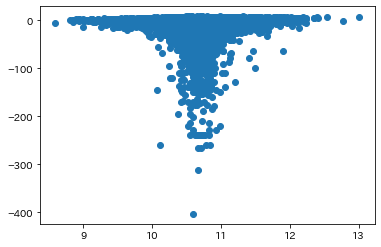

In [214]:
# いやわからん
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

In [218]:
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
coef

10.667048529685594


,feature,coef
0,皇居からの距離,-0.001781
1,歩,-0.032725
2,バス,-0.035345
3,車,-0.010311
4,最寄駅からの距離,-0.063555
5,築年数,-0.072321
6,地上,0.048379
7,地下,0.083040
8,階数,0.052316
9,階,-0.155887


### 量→標準化　質→使わない　賃料30万以上を排除
結論：まあわかる予測ができている

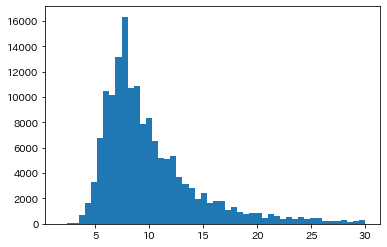

In [224]:
condition = suumo['賃料'] <= 30
plt.hist(suumo.loc[condition,'賃料'],bins=50)
plt.show()

In [246]:
# 賃料が高い暴力的な物件はひとまず置いておく

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [247]:
# カテゴリなしならどうなる？

# Xとyを定義
y = suumo_LR[target_feature]
X = suumo_LR[quantity_features]


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [248]:
# 2000件くらい減る
X.shape

(154308, 11)

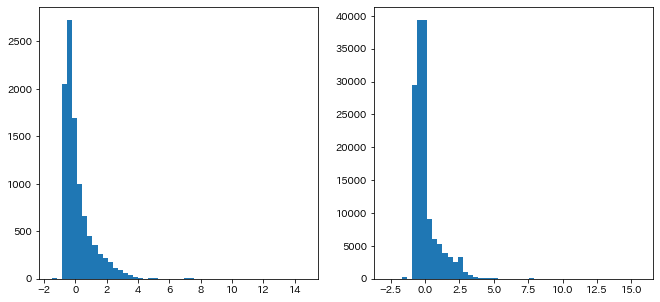

In [258]:
# きれいに分かれているかチェックシステム

i = 9

fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(X_train.iloc[:,i],bins=50)
ax2.hist(X_test.iloc[:,i],bins=50)
plt.show()

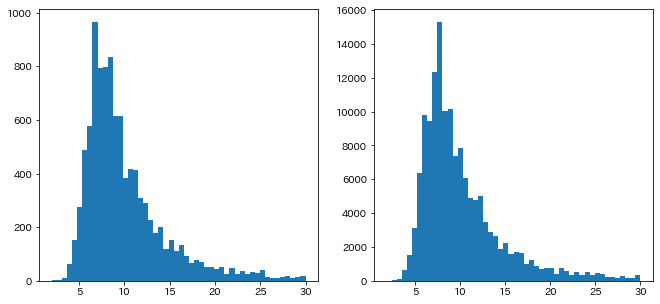

In [259]:
# きれいに分かれているかチェックシステム
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(y_train,bins=50)
ax2.hist(y_test,bins=50)
plt.show()

In [264]:
# まあわかるレベルになった
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7674304483441803
0.789322084910976


In [265]:
# まあわかるレベルになった
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

4.647400216410029
4.255797862868659


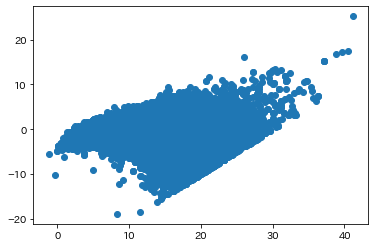

In [268]:
# 残差プロット
# まあわかるレベルになった
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

10.054975860753277


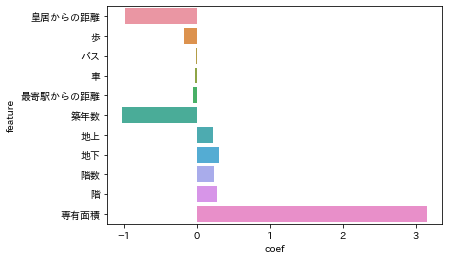

In [275]:
# 係数
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→そのまま（標準化なし）　質→使わない　賃料30万以上を排除
結論：まあわかる予測ができている　係数の解釈に注意

In [278]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
# suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [333]:
# カテゴリなしならどうなる？

# Xとyを定義
y = suumo_LR[target_feature]
X = suumo_LR[quantity_features]


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [280]:
# まあわかるレベルになった
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7674304483441802
0.7893220849109759


In [281]:
# まあわかるレベルになった
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

4.64740021641003
4.25579786286866


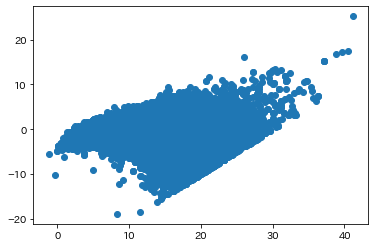

In [282]:
# 残差プロット
# まあわかるレベルになった
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

6.204593335885905


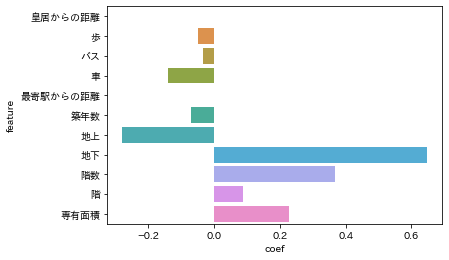

In [283]:
# 係数
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

In [284]:
coef

,feature,coef
0,皇居からの距離,-0.000274
1,歩,-0.047073
2,バス,-0.033337
3,車,-0.140474
4,最寄駅からの距離,-0.000150
5,築年数,-0.070119
6,地上,-0.278181
7,地下,0.646618
8,階数,0.368437
9,階,0.087853


### 量→標準化　質→使わない　賃料を対数変換
結論：対数変換してもクソでか数に抗えない

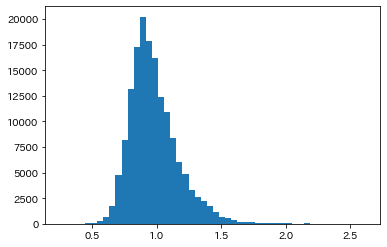

In [313]:
# 賃料を対数変換(底10)
# クソでか奴がマイルドになる
plt.hist(np.log10(suumo['賃料']), bins=50)
plt.show()

In [309]:
# 準備フェイズ

from sklearn.linear_model import LinearRegression

suumo_LR = copy.copy(suumo.sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [332]:
# カテゴリなしならどうなる？

# Xとyを定義
# yは対数変換(底10)
X = suumo_LR[quantity_features]
y = np.log10(suumo[target_feature])

# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [319]:
# わかりません
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(10**y_train, 10**y_train_pred))
print(r2_score(10**y_test, 10**y_test_pred))

-0.0249275719299904
-0.022304683640005818


In [320]:
# わかりません
print(mean_squared_error(10**y_train, 10**y_train_pred))
print(mean_squared_error(10**y_test, 10**y_test_pred))

52.30912604568518
69.6402515930624


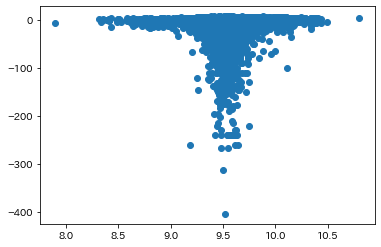

In [322]:
# 残差プロット
# 対数変換する前と大して変わって無くない？
different = 10**y_test_pred - 10**y_test
plt.scatter(10**y_test_pred, different)
plt.show()

0.9789780326546398


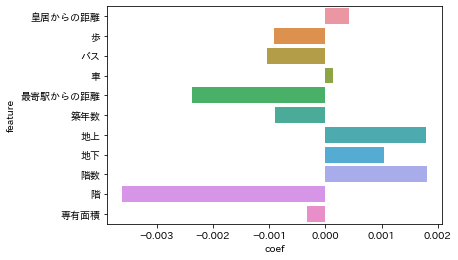

In [316]:
# 係数
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化　質→使わない　賃料30万以下限定+対数変換
結論：結構わかる

In [340]:
# 賃料が高い暴力的な物件はひとまず置いておく

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [341]:
# カテゴリなしならどうなる？

# Xとyを定義
y = np.log10(suumo_LR[target_feature])
X = suumo_LR[quantity_features]


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [353]:
# 訓練がゴミになるけどテストはわかるらしい
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))
print(r2_score(10**y_train, 10**y_train_pred))
print(r2_score(10**y_test, 10**y_test_pred))

0.7956535880178831
0.8204602671671094
-96.85971623208037
0.7153610563124585


In [354]:
# 訓練がゴミになるけどテストはわかるらしい
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(10**y_train, 10**y_train_pred))
print(mean_squared_error(10**y_test, 10**y_test_pred))

0.005810215063642166
0.005124025628263585
1955.5150842266917
5.749847143317122


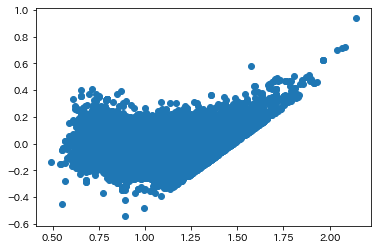

In [359]:
# 残差プロット
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

0.9675087153095494


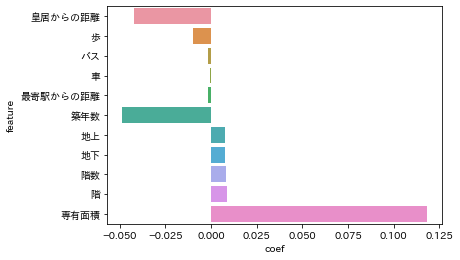

In [352]:
# 係数
# 係数はだいぶわかる
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化　質→カテゴリだけ　賃料30万以下限定
結論：若干よくなったっぽい

In [389]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [390]:
# 先にyを回収
y = suumo_LR[target_feature]

# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category.iloc[:,0:4]],axis=1)

# Xとyを定義

X = suumo_LR


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [391]:
# まあわかるレベルになった
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7675902073158374
0.7895218099744516


In [392]:
# まあわかるレベルになった
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

4.644207778388083
4.251763318014056


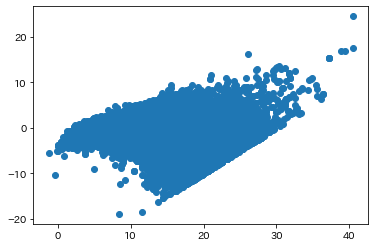

In [393]:
# 残差プロット
# まあわかるレベルになった
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

9.830912862678321


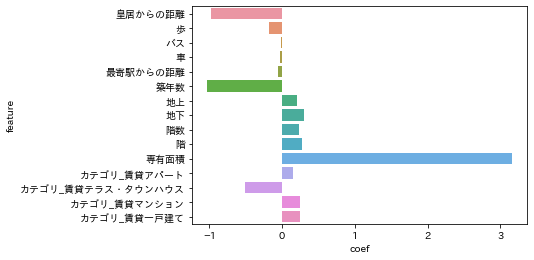

In [394]:
# 係数
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化　質→OneHotして全部　賃料30万以下限定
結論：地上と階数が破壊した

In [417]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [418]:
# 先にyを回収
y = suumo_LR[target_feature]

# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category],axis=1)

# Xとyを定義

X = suumo_LR


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [419]:
# 全然わかりませんが
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8798934750786305
-1.6115766607897836e+16


In [420]:
# 全然わかりませんが
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

2.400069510121797
3.2554643926203776e+17


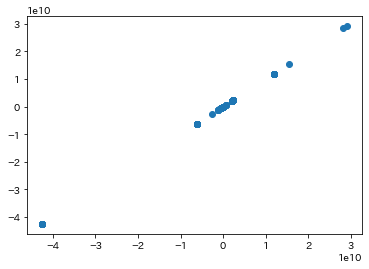

In [421]:
# 残差プロット
# 全然わかりませんが
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

2128251076.5888526


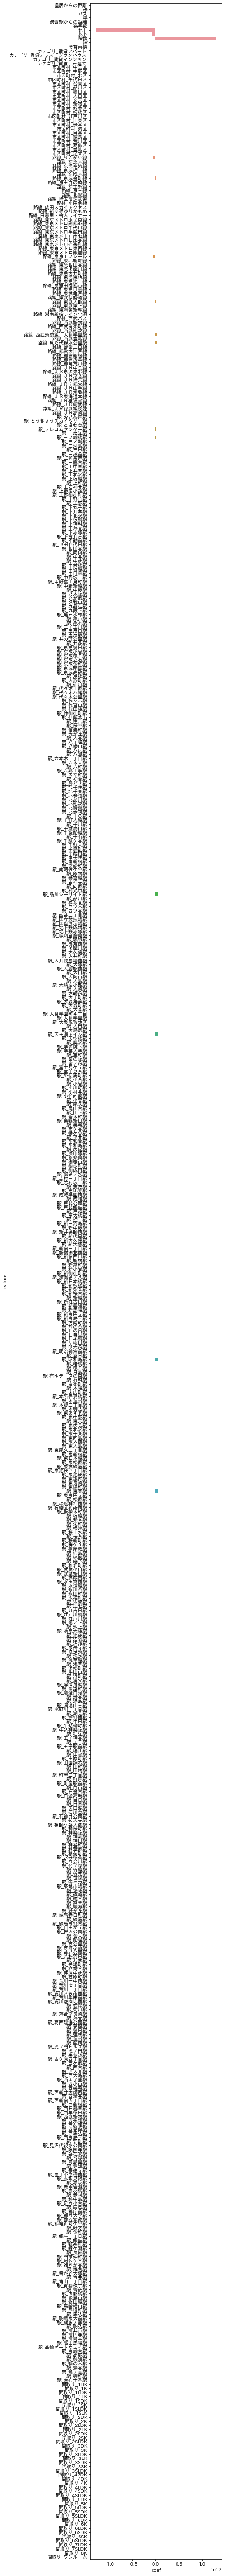

In [422]:
# 係数
# 地上と階数がぶっ壊しているらしい
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
plt.figure(figsize=(5,100))
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化、階数を削除　質→OneHotして全部　賃料30万以下限定
結論：間取りがバグり始めた

In [410]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
#    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [411]:
# 先にyを回収
y = suumo_LR[target_feature]

# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category],axis=1)

# Xとyを定義

X = suumo_LR


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [412]:
# 全然わかりませんが
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8798935898165653
-3.5495059105775542e+19


In [413]:
# 全然わかりませんが
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

2.400067217331965
7.170177121836643e+20


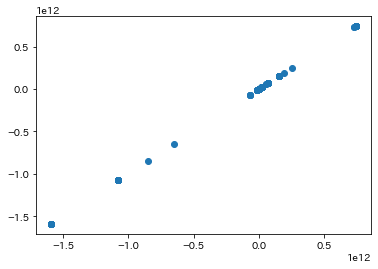

In [414]:
# 残差プロット
# 全然わかりませんが
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

740006257093.6622


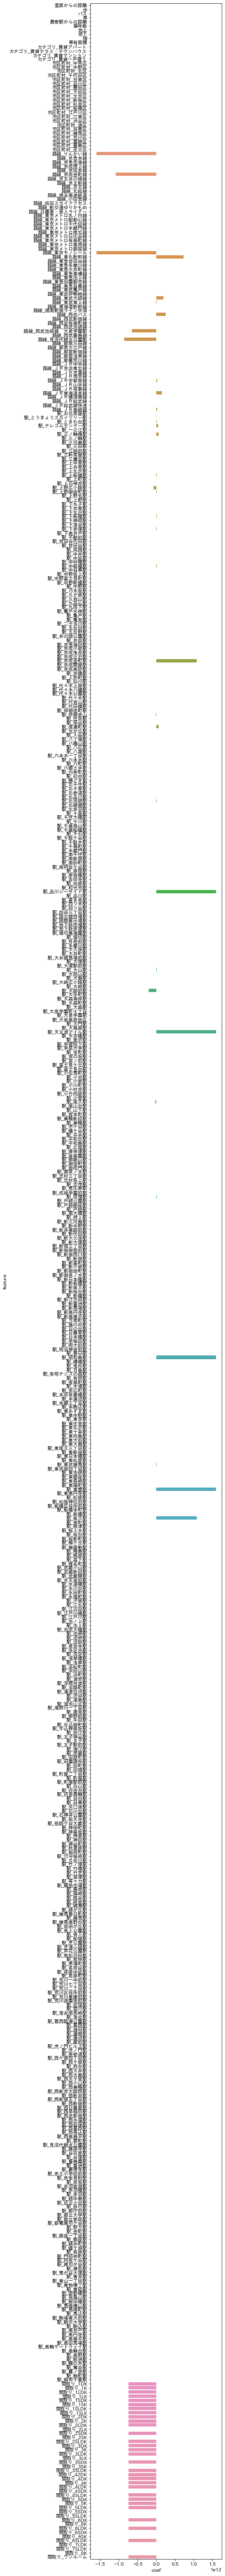

In [416]:
# 係数
# 間取りがバグり始めた
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
plt.figure(figsize=(5,100))
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化、階数を削除　質→OneHotして間取り以外　賃料30万以下限定
結論：一部の路線や駅が破壊している？

In [423]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
#    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
    '路線',
    '駅',
#    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [424]:
# 先にyを回収
y = suumo_LR[target_feature]

# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category],axis=1)

# Xとyを定義

X = suumo_LR


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [425]:
# 全然わかりませんが
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8495228815942281
-8.445241178651183e+17


In [426]:
# 全然わかりませんが
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

3.0069602304547516
1.7059803987677958e+19


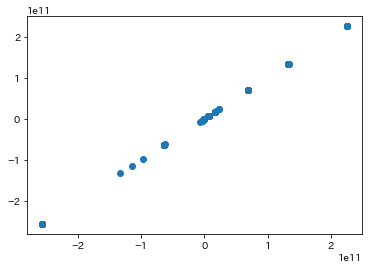

In [427]:
# 残差プロット
# 全然わかりませんが
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

13.32636383416748


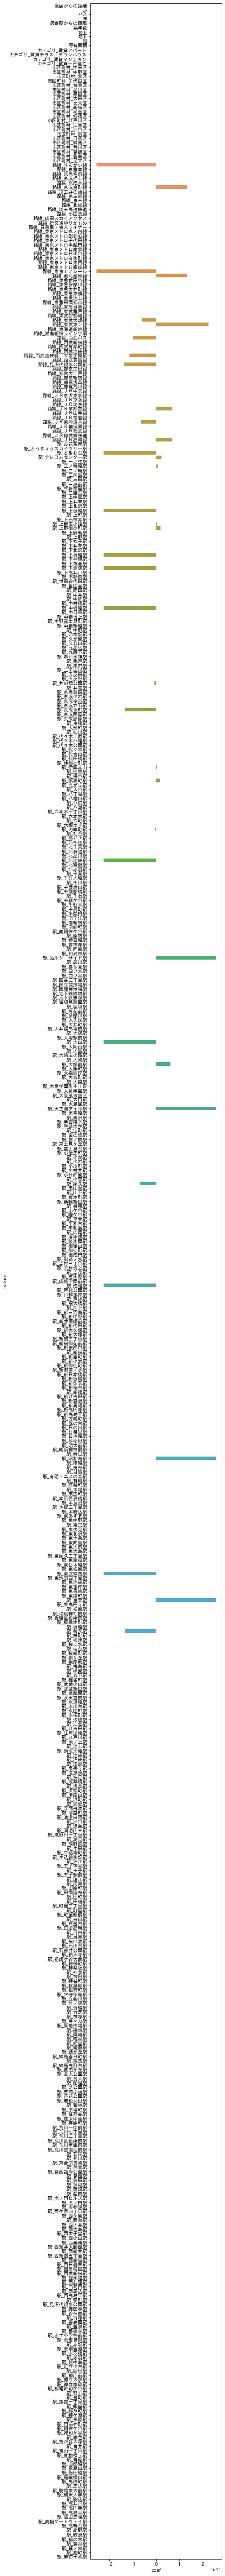

In [429]:
# 係数
# 一部の路線や駅が破壊しているようでならない
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
plt.figure(figsize=(5,100))
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化、階数を削除　質→OneHotして路線と駅削除　賃料30万以下限定
結論：やはり間取りはバグなのか？

In [436]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
#    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
#    '路線',
#    '駅',
    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [437]:
# 先にyを回収
y = suumo_LR[target_feature]

# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category],axis=1)

# Xとyを定義

X = suumo_LR


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [438]:
# 全然わかりませんが
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8537392942905984
-2.123604427076143e+21


In [439]:
# 全然わかりませんが
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

2.922704328776855
4.2897857511596e+22


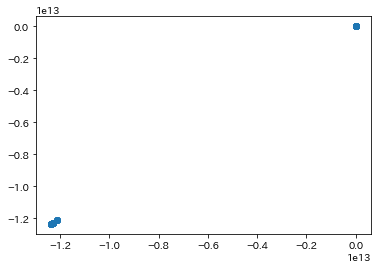

In [440]:
# 残差プロット
# 全然わかりませんが
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

-12274362473574.158


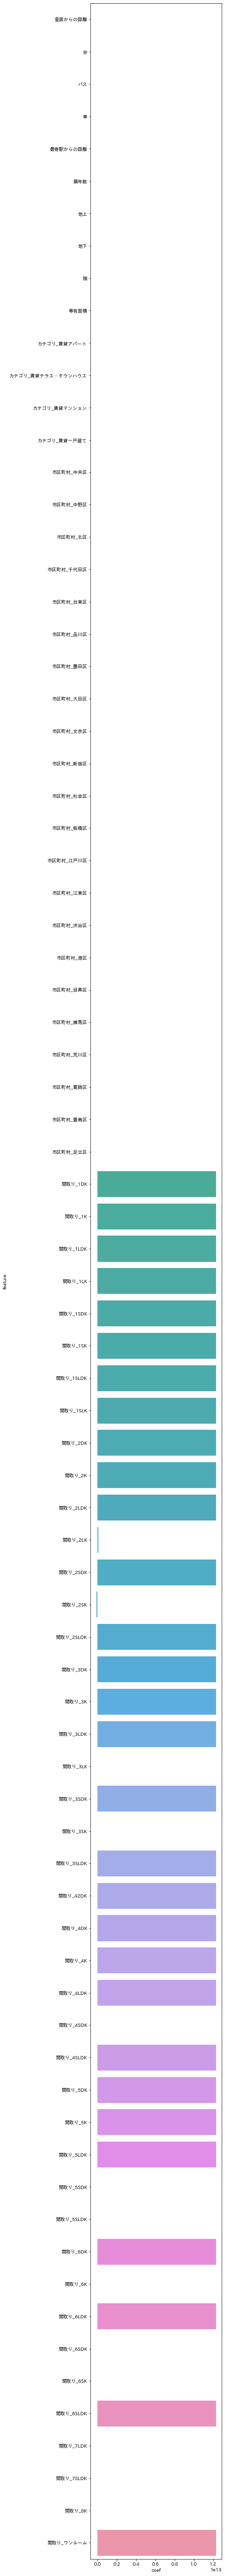

In [442]:
# 係数
# 結局バグる間取りくん
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
plt.figure(figsize=(5,100))
sns.barplot(data = coef, x='coef', y='feature')
plt.show()

### 量→標準化、階数を削除　質→OneHotして路線,駅,間取り削除　賃料30万以下限定
結論：それなりにわかる結果に。

In [443]:
# 賃料が高い暴力的な物件はひとまず置いておく
# 標準化なしで実験

# 準備フェイズ

from sklearn.linear_model import LinearRegression

condition = suumo['賃料'] <= 30
suumo_LR = copy.copy(suumo[condition].sample(frac=1, random_state=2))

target_feature = '賃料'
quantity_features = [
    '皇居からの距離',
    '歩',
    'バス',
    '車',
    '最寄駅からの距離',
    '築年数',
    '地上',
    '地下',
#    '階数',
    '階',
    '専有面積',
]
category_features = [
    'カテゴリ',
    '市区町村',
#    '路線',
#    '駅',
#    '間取り',
]

# 量的変数を標準化
ss = StandardScaler()
suumo_LR[quantity_features] = ss.fit_transform(suumo_LR[quantity_features])

# カテゴリ変数をOneHot
suumo_LR_category = pd.get_dummies(suumo_LR[category_features], drop_first=True)

In [444]:
# 先にyを回収
y = suumo_LR[target_feature]

# 合体
suumo_LR = pd.concat([suumo_LR[quantity_features],suumo_LR_category],axis=1)

# Xとyを定義

X = suumo_LR


# 訓練、テストに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 10000, random_state=0)

In [445]:
# まあわかる感じになった
LR = LinearRegression()
LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.8216768887206656
0.8428753118506465


In [446]:
# まあわかる感じになった
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

3.563402259883705
3.1739962480042636


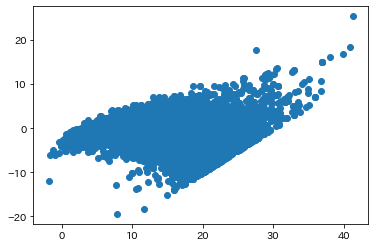

In [447]:
# 残差プロット
# まあわかる感じになった
different = y_test_pred - y_test
plt.scatter(y_test_pred, different)
plt.show()

11.115286058026696


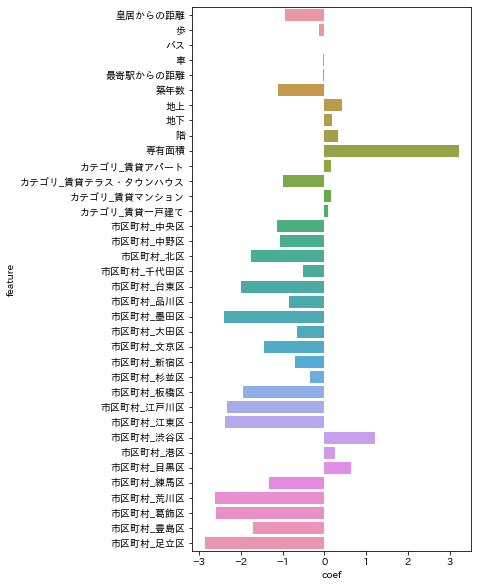

In [451]:
# 係数
# 細かすぎる分け方はバグを呼ぶのでしょうか？
coef = pd.DataFrame({
    'feature':X_train.columns,
    'coef':LR.coef_
})
print(LR.intercept_)
plt.figure(figsize=(5,10))
sns.barplot(data = coef, x='coef', y='feature')
plt.show()